# Data analysis with E-verify companies data

As a graduating international student on an F1 visa, the US government requires that I have to work for an E-verified company to apply for a STEM OPT visa. Rather than manually searching for each company, I decided to get a systematic understanding of them. Luckily, data about this is provided by the government at the following website: 

https://www.e-verify.gov/

This website provides detailed information with options for filtering out more relevant factors such as locations, industries, account status. As I am most interested in getting a data science job, I decided to look at the Information industry. This restriction is not entirely valid as many companies in other sectors also invest in mathematicians/data scientists. For example, here are some mathematicians/data scientists at Chevron and Philadelphia 76ers. 

Chevron: https://www.chevron.com/stories/i-am-a-data-scientist

Philadelphia 76ers: https://www.youtube.com/watch?v=MpLHMKTolVw

All relevant information is included in the excel file "Employer-export.csv". 

In this notebook, I will use data science skills to extract useful information from this file. 

First, we load some essential libraries for doing data analyses. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

**First, let us load the csv file.**

In [2]:
df=pd.read_csv('employer-export.csv')
df.head(5)

,Employer,Doing Business As,Account Status,Date Enrolled,Date Terminated,Workforce Size,Number of Hiring Sites,Hiring Site Locations (by state)
0,080 Mellon Analytical Solutions LLC (PA for C...,NaN,Terminated,09/17/2009,06/26/2011,100 to 499,3,"CA, PA, WA"
1,081 Mellon Analytical Solutions Inc (Pittsburgh),NaN,Terminated,10/21/2009,08/10/2011,20 to 99,1,PA
2,1 Stop Money Centers LLC,NaN,Open,08/08/2019,NaN,20 to 99,8,AZ
3,"1 Stop Money Centers, LLC",NaN,Open,03/10/2020,NaN,20 to 99,1,AZ
4,1 Washington Avenue Corp,NaN,Open,02/01/2017,NaN,500 to 999,2,"FL, MA"


As we can see, this dataframe provides many key information about a company: their workforce size, number o hiring sites as well as hiring states. This certainly helps job seekers to narrow down their job searches.

# **Question: How many companies enrolled in the E-verified program?**

As the first attempt, we can simply compute the number of rows in this dataframe. 

In [3]:
df.shape[0]

18174

However, if we take a closer look at the dataframe, we will see that several companies have multiple appearances. We can check that by the following code.

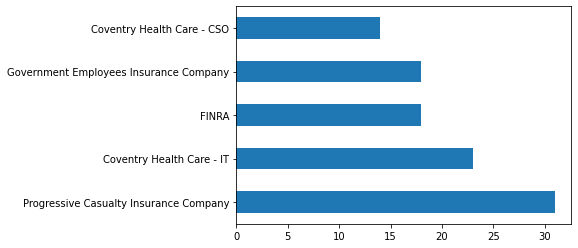

In [4]:
df['Employer'].value_counts().head(5).plot(kind='barh')
plt.show()

Let us dive into a particular company: Progressive Casualty Insurance Company.

In [5]:
df[df['Employer']=='Progressive Casualty Insurance Company'].head()

,Employer,Doing Business As,Account Status,Date Enrolled,Date Terminated,Workforce Size,Number of Hiring Sites,Hiring Site Locations (by state)
13251,Progressive Casualty Insurance Company,NaN,Open,08/17/2011,NaN,20 to 99,1,LA
13252,Progressive Casualty Insurance Company,NaN,Open,08/17/2011,NaN,20 to 99,1,LA
13253,Progressive Casualty Insurance Company,NaN,Open,08/17/2011,NaN,20 to 99,1,LA
13254,Progressive Casualty Insurance Company,NaN,Open,08/23/2011,NaN,5 to 9,1,LA
13255,Progressive Casualty Insurance Company,NaN,Open,08/17/2011,NaN,5 to 9,1,LA


The data from the first three rows are identical. What does that mean? Does it mean that Progressive has three similar branches in LA, or is it merely a mistake from data collectors? To partially answer this question, let us take a look at what the website says about the data: 

"If the search tool results include the name of a business with more than one hiring site or business location, it does not necessarily mean that all of the hiring sites are enrolled in E-Verify. A hiring site is where the employer hires employees and completes Form I-9, Employment Eligibility Verification. Employers with multiple locations may choose which of their sites participate in E-Verify."

This suggests that a big company may register for E-verify at different sites/branches and may appear multiple times. From a job seeker's perspective, other hiring sites matter. For example, she/he may have preferences in working at a particular location. 

For this reason, we will consider duplicated names to be different in our data analysis.


As a job seeker, it is equally important to know whether a company is still participating in the E-verify program. We can get this information by the following code. 

In [6]:
df['Account Status'].value_counts()

Open          15803
Terminated     2371
Name: Account Status, dtype: int64

So, there are currently at least 15803 places that we can apply to!

# **Question: How established companies are?**

Job seekers have different preferences in choosing a company: some prefer to work for an established company while others prefer to work for a newly launched one. Before diving into this question, I want to remark that the day a company enrolled in the E-verify program might not be the same as the day it is officially launched. However, if a company is serious enough to seek highly skilled workers, it is fair to say they would consider joining E-verify as soon as possible. Therefore, how long a company has been enrolled in the E-verify program should tell us a lot about their establishment.

The relevant information is stored in the Enrollment and Account Status columns. To make it is easier for numerical computations, we will first convert the datatype of some columns. 

In [7]:
#convert the data into datetime data. This will help numerical computations
df['Date Enrolled']=pd.to_datetime(df['Date Enrolled'])
df['Date Terminated']=pd.to_datetime(df['Date Terminated'])

For the moment, we will focus on companies that are currently open.

In [8]:
open_df=df[df['Account Status']=='Open']
open_df.head()

,Employer,Doing Business As,Account Status,Date Enrolled,Date Terminated,Workforce Size,Number of Hiring Sites,Hiring Site Locations (by state)
2,1 Stop Money Centers LLC,NaN,Open,2019-08-08,NaT,20 to 99,8,AZ
3,"1 Stop Money Centers, LLC",NaN,Open,2020-03-10,NaT,20 to 99,1,AZ
4,1 Washington Avenue Corp,NaN,Open,2017-02-01,NaT,500 to 999,2,"FL, MA"
5,"10400 N. 25th Ave., Suite 200","AVESIS, INC",Open,2015-11-19,NaT,500 to 999,2,"AZ, MD"
9,1199SEIU Benefit & Pension Funds,1199SEIU National Benefit Fund,Open,2014-01-09,NaT,"1,000 to 2,499",1,NY


We can then compute the number of years companies have been registered with E-verify.

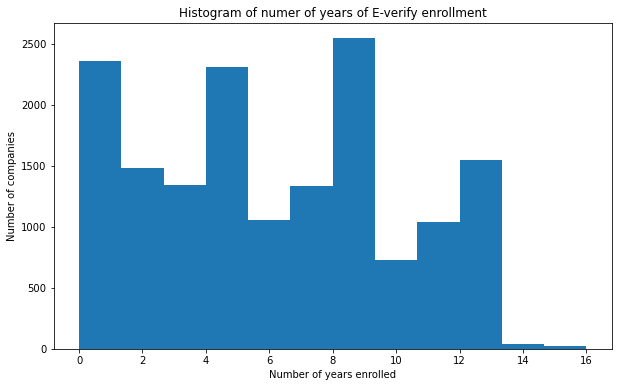

In [9]:
plt.figure(figsize=(10,6))
open_df=open_df[:]
open_df['Years_Enrolled']= datetime.date.today().year-pd.DatetimeIndex(open_df['Date Enrolled']).year
open_df['Years_Enrolled'].plot(kind='hist', bins=12)
plt.xlabel('Number of years enrolled')
plt.ylabel('Number of companies')
plt.title('Histogram of numer of years of E-verify enrollment')
plt.show()

So, most companies enrolled in the E-verify program for less than 9 years. This kind of makes sense because the ICE Memorandum of Agreement (MOA)was signed in 2008 (the year OPT STEM started.) Take a look at this link for more details.

https://www.e-verify.gov/about-e-verify/history-and-milestones#y2008


There are some really established companies. Let us investigate who they are.

In [10]:
print(f"There are {open_df[open_df['Years_Enrolled']>12].shape[0]} companies enrolled more than 12 years. Here are some of them:")
open_df[open_df['Years_Enrolled']>12].tail(5)

There are 544 companies enrolled more than 12 years. Here are some of them:


,Employer,Doing Business As,Account Status,Date Enrolled,Date Terminated,Workforce Size,Number of Hiring Sites,Hiring Site Locations (by state),Years_Enrolled
18024,WORLD ALLIANCE FINANCIAL CORP.,NaN,Open,2007-10-08,NaT,100 to 499,3,"MI, NY",13
18124,Your Legacy Federal Credit Union,FNA Tiffin St Joseph Federal Credit Union,Open,2007-08-27,NaT,20 to 99,1,OH,13
18155,Zero Down Consultants LLC,NaN,Open,2007-11-07,NaT,5 to 9,1,AZ,13
18160,zhanje and company,NaN,Open,2007-10-10,NaT,5 to 9,1,GA,13
18165,"Zions Bancorporation, National Association","Zions Bancorporation, National Association",Open,2007-02-13,NaT,"10,000 and over",645,"AL, AZ, CA, CO, FL, GA, IA, ID, IL, IN, MA, MN...",13


It is surprised to me that lots of company is just enrolled lately. Let us take a closer look at those companies.

In [11]:
print(f"There are {open_df[open_df['Years_Enrolled']==0].shape[0]} companies openned this year. Here are some of them:")
open_df[open_df['Years_Enrolled']==0].sample(5)

There are 491 companies openned this year. Here are some of them:


,Employer,Doing Business As,Account Status,Date Enrolled,Date Terminated,Workforce Size,Number of Hiring Sites,Hiring Site Locations (by state),Years_Enrolled
13472,Queensborough National Bank & Trust Company,NaN,Open,2020-01-27,NaT,100 to 499,1,GA,0
1271,Arc Home LLC,Arc Home LLC,Open,2020-01-27,NaT,100 to 499,1,NJ,0
5406,"DYNASTY FINANCE, INC.",DYNASTY FINANCE,Open,2020-01-27,NaT,5 to 9,1,AZ,0
192,ABSALOM HOME HEALTH AGENCY LLC.,ABSALEM HOME HEALTH AGENCY LLC.,Open,2020-01-17,NaT,10 to 19,1,CA,0
11304,MS Health Care Insurance Services Corporation,NaN,Open,2020-03-25,NaT,20 to 99,1,MS,0


# Question: How long did terminated companies participate in the E-verify program?

First, we need to compute the number of years a company participated in the E-verify program.

In [12]:
terminated_df=df[df['Account Status']=='Terminated']
enrolled=pd.DatetimeIndex(terminated_df['Date Enrolled']).year
terminated=pd.DatetimeIndex(terminated_df['Date Terminated']).year
terminated_df=terminated_df.copy()
terminated_df['Years_Enrolled']=terminated-enrolled
terminated_df.head()

,Employer,Doing Business As,Account Status,Date Enrolled,Date Terminated,Workforce Size,Number of Hiring Sites,Hiring Site Locations (by state),Years_Enrolled
0,080 Mellon Analytical Solutions LLC (PA for C...,NaN,Terminated,2009-09-17,2011-06-26,100 to 499,3,"CA, PA, WA",2
1,081 Mellon Analytical Solutions Inc (Pittsburgh),NaN,Terminated,2009-10-21,2011-08-10,20 to 99,1,PA,2
6,111 Bank of New York (1 Wall NYC),NaN,Terminated,2008-04-25,2011-09-15,"10,000 and over",16,"CA, CO, FL, GA, MA, NJ, NY, PA, TN, TX",3
7,"111 Bank of New York (Harrison, NY)",NaN,Terminated,2008-04-25,2011-08-10,"10,000 and over",1,NY,3
8,111 The Bank of New York (Wall),NaN,Terminated,2008-07-01,2011-08-11,"5,000 to 9,999",7,"NJ, NY",3


We can create a bar plot based on this dataframe.

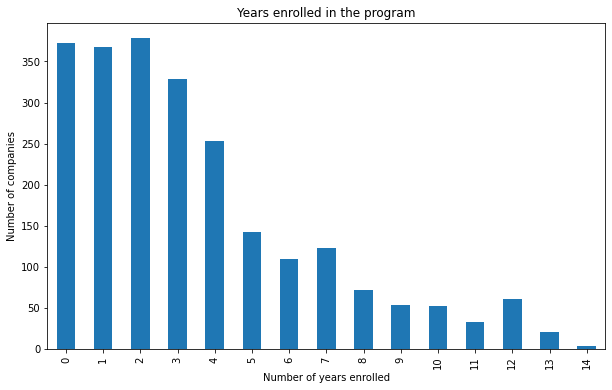

In [13]:
plt.figure(figsize=(10,6))
terminated_df['Years_Enrolled'].value_counts().sort_index().plot(kind='bar')
plt.title('Years enrolled in the program')
plt.xlabel('Number of years enrolled')
plt.ylabel('Number of companies')
plt.show()

It comes to a big surprise to us that lot of companies only enrolled in less than 2 years. What are the reasons for their withdrawal?

# Question: How the number of newly registered companies changes over time?

Is this true that E-verified program is becoming more popular over time? Let us investigate this question.

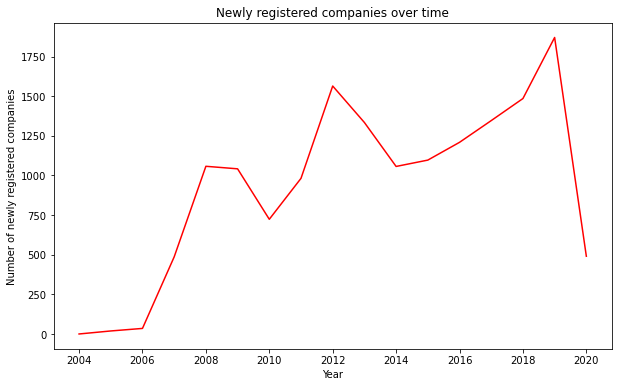

In [14]:
plt.figure(figsize=(10,6))
yearly_data=pd.DatetimeIndex(open_df['Date Enrolled']).year.value_counts().sort_index()
yearly_data.plot(kind='line', color='red')
plt.xlabel('Year')
plt.ylabel('Number of newly registered companies')
plt.title('Newly registered companies over time')
plt.show()

Good news for job seekers: the data indicates that the E-verify program is becoming more and more popular over time. There is a significant drop in 2020. There are two possible explanations for this. First, this project is being done in July. Second, there is an ongoing COVID 19 pandemic, which renders new companies from joining the program.

# Question: How big comapanies are?

Another factor that job seekers are interested in is how big a company is. Let take a look at the number of workforce size. 

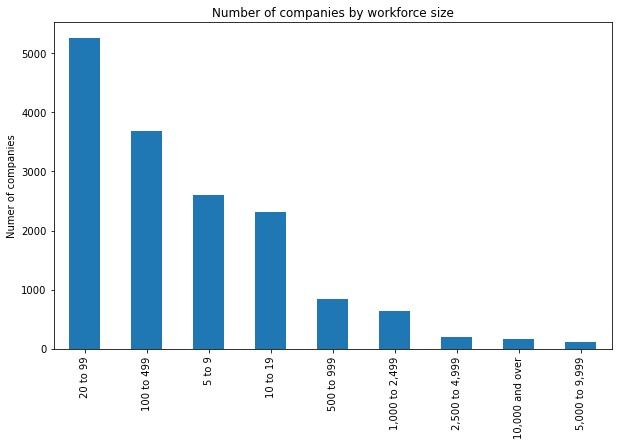

In [15]:
plt.figure(figsize=(10,6))
open_df['Workforce Size'].value_counts().plot(kind='bar')
plt.ylabel("Numer of companies")
plt.title("Number of companies by workforce size")
plt.show()

The majority of comapnies has less than 500 employees. Let us dive in to see some companies that have the most number of employees. 

In [16]:
print(f"There are {open_df[open_df['Workforce Size']=='10,000 and over'].shape[0]} companies with more than 10000 employees")

open_df[open_df['Workforce Size']=='10,000 and over'].sample(5)

There are 168 companies with more than 10000 employees


,Employer,Doing Business As,Account Status,Date Enrolled,Date Terminated,Workforce Size,Number of Hiring Sites,Hiring Site Locations (by state),Years_Enrolled
11539,Nationwide Insurance,NaN,Open,2015-08-25,NaT,"10,000 and over",1,OH,5
11565,Navy Federal Credit Union,NaN,Open,2014-01-23,NaT,"10,000 and over",276,"AL, AZ, CA, CO, CT, DC, FL, GA, GU, HI, IL, KS...",6
447,Aflac,NaN,Open,2019-05-03,NaT,"10,000 and over",1,WA,1
7704,Government Employees Insurance Company,GEICO,Open,2017-12-21,NaT,"10,000 and over",1,WA,3
9471,JPMorgan Chase & Co.,NaN,Open,2017-03-19,NaT,"10,000 and over",1,NJ,3


It is not surprised that most companies in this list are in the finance/insurance sectors.

# Question: Top 10 companies with the most number of hiring sites?

For job seekers who really want to work for a particular company, it is good to have several choices of working locations. Let us investigate the data about this.

In [17]:
open_df['Number of Hiring Sites'].value_counts()

1       11235
2        1212
3         671
4         388
5         305
        ...  
1522        1
8393        1
197         1
181         1
1935        1
Name: Number of Hiring Sites, Length: 249, dtype: int64

It is surprising to see that lots of comapanies have more than 1000 hiring sites! Let us find the top 10 companies that have the most number of hiring sites.

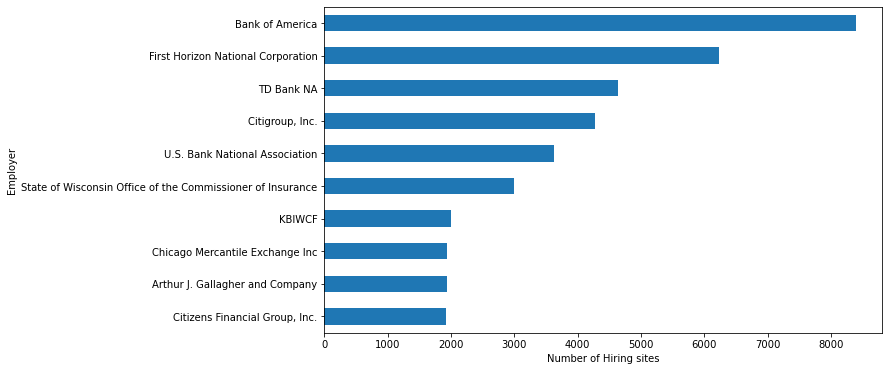

In [18]:
plt.figure(figsize=(10,6))
top_10_hiring_sites=open_df.sort_values('Number of Hiring Sites', ascending=False ).head(10).set_index('Employer')
top_10_hiring_sites.sort_values('Number of Hiring Sites')['Number of Hiring Sites'].plot(kind='barh')
plt.xlabel('Number of Hiring sites')
plt.show()

All these top 10 companies are in the insurance/finance sectors.

All of the above data analysyes are done using the explicit data. In what follows, I will use data engineering to answer more subtle and harder questions.

# Question: What are the true workforce sizes? 

As explored in the previous parts, a company may have several hiring sites. According to the following governmental document, the workforce size is computed by aggregating over all hiring sites. 

https://www.eeoc.gov/how-do-you-count-number-employees-employer-has

Consequently, the actual workforce size could be much lower than the workforce size provided by the above data. This is kind of important for job seekers. Some prefer to work with a big team while others prefer to work with a smaller one. 

Since the workforce size data is not numeric, we cannot use that directly to compute the true workforce sizes. Instead, we will approximate the workforce size by taking the average of the lower bound and the upper bound. For example, if the data says the workforce size is "20-99", we will take 59. We will then divide this number by the number of hiring sites to get the right workforce site. Mathematically: 

$$\text{True workforce size}=\left[\dfrac{\text{lower bound} + \text{upper bound}}{2 * \text{number of hiring sites}} \right]$$


In [19]:
def average_workforce_size(text):
    if text =='10,000 and over':
        return 10000
    else:
        return (int(text.split()[0].replace(',', ''))+int(text.split()[-1].replace(',', '')))/2
open_df=open_df[open_df['Number of Hiring Sites']>0]    
open_df['True_Workforce_Size']=open_df['Workforce Size'].apply(average_workforce_size)//open_df['Number of Hiring Sites']
open_df.sample(5)

,Employer,Doing Business As,Account Status,Date Enrolled,Date Terminated,Workforce Size,Number of Hiring Sites,Hiring Site Locations (by state),Years_Enrolled,True_Workforce_Size
12726,Personal Capital Corporation,NaN,Open,2015-05-18,NaT,100 to 499,5,"CA, CO, GA, TX",5,59.0
5292,Dominion Residential Mortgage,NaN,Open,2011-03-14,NaT,20 to 99,1,VA,9,59.0
3750,Citizens Bank and Trust,NaN,Open,2008-11-19,NaT,20 to 99,1,LA,12,59.0
8471,"Home-Probe, Inc",NaN,Open,2019-07-02,NaT,10 to 19,2,"GA, SC",1,7.0
3605,Chicago Community Loan Fund,NaN,Open,2009-04-27,NaT,10 to 19,1,IL,11,14.0


Let us examine the distribution True Work Force Size. To have a meaningful plot, we will only include compananies whose true workforce size is less than 500. 

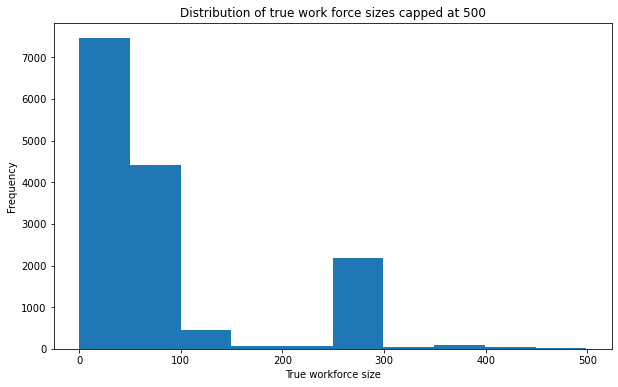

In [20]:
plt.figure(figsize=(10,6))
open_df[open_df['True_Workforce_Size']<500]['True_Workforce_Size'].plot(kind='hist')
plt.title('Distribution of true work force sizes capped at 500')
plt.xlabel('True workforce size')
plt.show()

We see that if we cap at 500, the majority of places have less than 100 employees. If a job seeker wants to work with big teams, she might be interested in places with more than 1000 employees. We can take a look at that as well. 

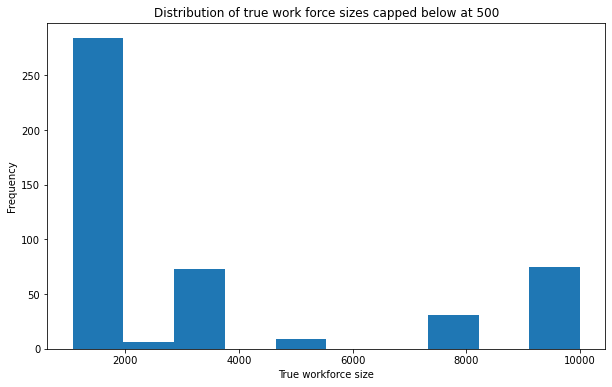

In [21]:
plt.figure(figsize=(10,6))
open_df[open_df['True_Workforce_Size']>1000]['True_Workforce_Size'].plot(kind='hist')
plt.title('Distribution of true work force sizes capped below at 500')
plt.xlabel('True workforce size')
plt.show()

We see that this job seeker has tons of choices!

# Question:  What are the top hiring states?

First, let use get the list of all states.

In [22]:
states=set()

for i in range(len(open_df)):
    states=states.union(set(open_df.iloc[i]['Hiring Site Locations (by state)'].replace(',', ' ').split()))
len(states)

55

According to this website below, this number indicates that all states and territories have a at least one hiring sites. 

https://www.mcc.co.mercer.pa.us/dps/state_fips_code_listing.htm

<Figure size 720x432 with 0 Axes>

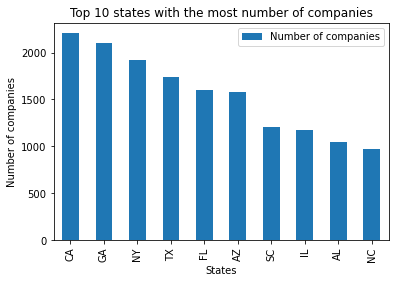

In [23]:
def counting(dictionary, new_list):
    """
    Update a given dictionary with a new list.
    
    """
    for item in new_list:
        dictionary[item]=dictionary.get(item,0)+1
    return dictionary    

#count the number of companies for each state
dictionary=dict(zip(list(states), [0]*len(states)))

for i in range(len(open_df)):
    new_list =open_df.iloc[i]['Hiring Site Locations (by state)'].replace(',', '').split()
    dictionary= counting(dictionary, new_list)

#for visualization, we create a dataframe out of this dictionary
counting_by_states = pd.DataFrame.from_dict(dictionary, orient='index')
counting_by_states.columns=['Number of companies']

#top 10 states with the most number of companies
fig=plt.figure(figsize=(10,6))
counting_by_states.sort_values('Number of companies', ascending=False).iloc[:10].plot(kind='bar')    
plt.title("Top 10 states with the most number of companies")
plt.xlabel('States')
plt.ylabel('Number of companies')
plt.show()

We can equally find out the bottem 5 states with the least number of companies. 

<Figure size 2880x2880 with 0 Axes>

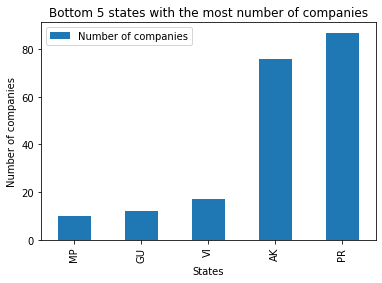

In [24]:
#bottom 5 states with the least number of companies
fig=plt.figure(figsize=(40,40))
counting_by_states.sort_values('Number of companies').head(5).plot(kind='bar')    
plt.title("Bottom 5 states with the most number of companies")
plt.xlabel('States')
plt.ylabel('Number of companies')
plt.show()

The members in this list are: Guam (GU), Virgin Islands (VI), Alaska (AK), Puerto Rico (PR). We have not been able to track down what MP stands for. 

 

# Conclusions

Here are some interesting and essential facts that we learn from this dataset. 

1. There are more than 15000 companies in the information industry currently enrolled in the E-verify program. In other words, there are tons of opportunities for me. 


2. The majority of companies have enrolled in the E-verify program for less than nine years. The number of registering companies keeps increasing until 2020, where the COVID 19 pandemic hits. 


3. Most companies have less than 500 employees. If we take into account multiple hiring sites, the majority of them have about 50-100 employees. 


4. The top three companies with the most number of hiring sites are Bank of America, First Horizon National Corporation, TD Bank NA. Banks and financial institutes usually have the most number of hiring sites. 


5. The top ten hiring states are CA, GA, NY, TX, FL, AZ, SC, IL, AL, NC. 

